In [6]:
#Load Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime


In [2]:
#Load Data
df = pd.read_csv('data/household_power_consumption.txt',sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185711 non-null  object 
 3   Global_reactive_power  185711 non-null  object 
 4   Voltage                185711 non-null  object 
 5   Global_intensity       185711 non-null  object 
 6   Sub_metering_1         185711 non-null  object 
 7   Sub_metering_2         185711 non-null  object 
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 12.8+ MB


In [4]:
# mark all missing values
df.replace('?', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)

In [8]:
df.replace({'8': '20/1/2007'}, inplace=True)

In [9]:
# make dataset numeric
df['Global_active_power'] = [float(x) for x in df['Global_active_power']]
df['Global_reactive_power'] = [float(x) for x in df['Global_reactive_power']]
df['Voltage'] = [float(x) for x in df['Voltage']]
df['Global_intensity'] = [float(x) for x in df['Global_intensity']]
df['Sub_metering_1'] = [float(x) for x in df['Sub_metering_1']]
df['Sub_metering_2'] = [float(x) for x in df['Sub_metering_2']]
df['Sub_metering_3'] = [float(x) for x in df['Sub_metering_3']]

In [ ]:
#Change to datetime format and make sure that the format is correct
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S', errors='coerce').dt.time

In [10]:
# merge Date and Time into a datetime object
util_series = df['Date'] + " " + df['Time']
df['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
185706,24/4/2007,16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,24/4/2007,16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,24/4/2007,16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,24/4/2007,16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [11]:
# Count the number of null values
df.isnull().sum()

Date                      0
Time                      0
Global_active_power      10
Global_reactive_power     9
Voltage                  10
Global_intensity         11
Sub_metering_1            9
Sub_metering_2            9
Sub_metering_3            9
DateTime                  0
dtype: int64

In [12]:
# Count the number of lines with null values
df.isnull().any(axis = 1).sum() 

13

In [13]:
dataset2 = df[df.isna().any(axis=1)]
print(dataset2)

              Date      Time  Global_active_power  Global_reactive_power  \
6       16/12/2006  17:30:00                3.702                  0.520   
6839    21/12/2006  11:23:00                  NaN                    NaN   
6840    21/12/2006  11:24:00                  NaN                    NaN   
19724   30/12/2006  10:08:00                  NaN                    NaN   
19725   30/12/2006  10:09:00                  NaN                    NaN   
41832    14/1/2007  18:36:00                  NaN                    NaN   
61909    28/1/2007  17:13:00                  NaN                    NaN   
98041    22/2/2007  19:25:00                4.300                  0.222   
98254    22/2/2007  22:58:00                  NaN                    NaN   
98255    22/2/2007  22:59:00                  NaN                    NaN   
131276   17/3/2007  21:20:00                  NaN                  0.114   
142588   25/3/2007  17:52:00                  NaN                    NaN   
185694   24/

<AxesSubplot:>

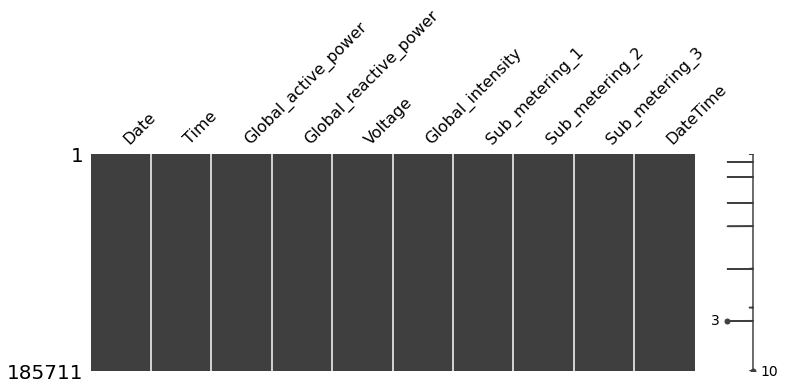

In [14]:
msno.matrix(df, figsize=(12, 4))

<AxesSubplot:title={'center':'Sub_metering_3'}>

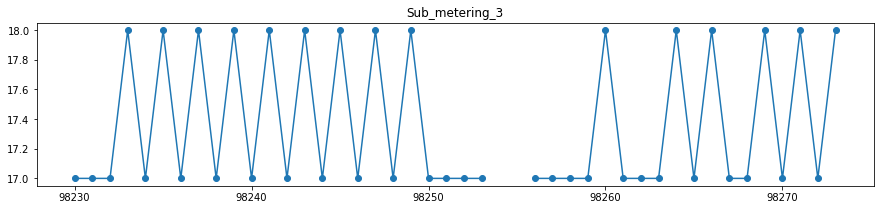

In [15]:
df["Sub_metering_3"][98230:98274].plot(title="Sub_metering_3", marker="o", figsize=(15,3))

In [16]:
df.iloc[49850:49860,:].head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
49850,20/1/2007,08:14:00,1.122,0.106,237.88,4.8,0.0,0.0,0.0,2007-01-20 08:14:00
49851,20/1/2007,08:15:00,1.122,0.108,238.40,4.6,0.0,0.0,0.0,2007-01-20 08:15:00
49852,20/1/2007,08:16:00,1.118,0.108,238.23,4.6,0.0,0.0,0.0,2007-01-20 08:16:00
49853,20/1/2007,08:17:00,1.606,0.102,237.83,7.6,0.0,0.0,0.0,2007-01-20 08:17:00
49854,20/1/2007,08:18:00,3.124,0.084,236.42,13.2,0.0,0.0,0.0,2007-01-20 08:18:00
49855,20/1/2007,08:19:00,2.984,0.086,236.34,12.6,0.0,0.0,0.0,2007-01-20 08:19:00
49856,20/1/2007,08:20:00,1.622,0.102,238.16,7.8,0.0,0.0,0.0,2007-01-20 08:20:00
49857,20/1/2007,08:21:00,0.840,0.114,239.48,3.6,0.0,0.0,0.0,2007-01-20 08:21:00
49858,20/1/2007,08:22:00,0.828,0.112,239.07,3.4,0.0,0.0,0.0,2007-01-20 08:22:00
49859,20/1/2007,08:23:00,0.834,0.118,240.46,3.4,0.0,0.0,0.0,2007-01-20 08:23:00


In [17]:
#Replace the missing date with '2007-01-20' because it's the same date before and after the missing date
df['Date'] = df['Date'].replace(np.nan, '2007-01-20')

In [18]:
#Make changes to be all with the same unit ( change from KW to Watt-hour) 
df['Global_active_power'] = df['Global_active_power']*1000/60
df['Global_reactive_power'] = df['Global_reactive_power']*1000/60

In [19]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,185701.000000,185702.000000,185701.000000,185700.000000,185702.000000,185702.000000,185702.000000
mean,23.042456,2.027712,240.641969,5.852523,1.232561,1.783675,6.553521
std,21.554486,1.876765,3.168499,5.456051,6.498750,7.163004,8.469009
min,1.733333,0.000000,223.490000,0.600000,0.000000,0.000000,0.000000
25%,5.300000,0.000000,238.700000,1.400000,0.000000,0.000000,0.000000
50%,20.300000,1.766667,240.820000,5.200000,0.000000,0.000000,0.000000
75%,34.366667,3.166667,242.770000,8.600000,0.000000,1.000000,17.000000
max,177.833333,14.566667,251.700000,46.400000,77.000000,78.000000,20.000000


In [20]:
#Replace the missing values with the mean
df['Global_active_power'] = df['Global_active_power'].replace(np.nan, 23.042456)
df['Global_reactive_power'] = df['Global_reactive_power'].replace(np.nan, 2.027712)
df['Voltage'] = df['Voltage'].replace(np.nan, 240.641969)
df['Global_intensity'] = df['Global_intensity'].replace(np.nan, 5.852523)
df['Sub_metering_1'] = df['Sub_metering_1'].replace(np.nan, 1.232561)
df['Sub_metering_2'] = df['Sub_metering_2'].replace(np.nan, 1.783675)
df['Sub_metering_3'] = df['Sub_metering_3'].replace(np.nan, 6.553521)

In [21]:
#To verify that there is no missing value
df.isnull().any(axis = 1).sum()

0

In [22]:
df['Date'].describe() # the unique values shows that there is a dataset of 130 day [from 2006-12-06 to 2007-04-24] 
                    #   and the top freq is 1440 [24 hours * 60 min] that means the data of each min a day

count        185711
unique          130
top       19/2/2007
freq           1440
Name: Date, dtype: object

In [23]:
df['Date'].value_counts() # here there is a freq diffrent from 1440 that means that the last two days the data is not for all the day

19/2/2007     1440
23/4/2007     1440
20/3/2007     1440
19/3/2007     1440
18/3/2007     1440
              ... 
20/1/2007     1440
19/1/2007     1440
22/4/2007     1440
24/4/2007      995
16/12/2006     396
Name: Date, Length: 130, dtype: int64

In [24]:
df['Time'].describe() # Unique means that there is 1440 diffrent times [1440 min for one day]

count       185711
unique        1440
top       17:24:00
freq           129
Name: Time, dtype: object

In [25]:
df['Time'].value_counts() # the values is diffrent from 130 because the last two days there is missing data 

17:24:00    129
08:49:00    129
08:57:00    129
08:56:00    129
08:55:00    129
           ... 
16:53:00    128
16:54:00    128
16:55:00    128
16:56:00    128
17:23:00    128
Name: Time, Length: 1440, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   185711 non-null  object        
 1   Time                   185711 non-null  object        
 2   Global_active_power    185711 non-null  float64       
 3   Global_reactive_power  185711 non-null  float64       
 4   Voltage                185711 non-null  float64       
 5   Global_intensity       185711 non-null  float64       
 6   Sub_metering_1         185711 non-null  float64       
 7   Sub_metering_2         185711 non-null  float64       
 8   Sub_metering_3         185711 non-null  float64       
 9   DateTime               185711 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 14.2+ MB


C:\Users\saifa\AppData\Local\Temp\ipykernel_11720\2686295383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


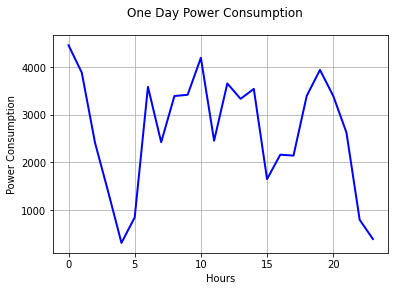

In [27]:
# Plot hourly Power Consumption for one day
df_plot = df[df.Date == '18/2/2007']
df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_data = df_plot[['hour', 'Global_active_power']]
hourly_data = df_plot.groupby(['hour'], as_index = False)['Global_active_power'].agg('sum')
plt.plot(hourly_data['hour'], hourly_data['Global_active_power'], 'b', linewidth=2.0)
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.suptitle('One Day Power Consumption')
plt.grid(True)
plt.show()

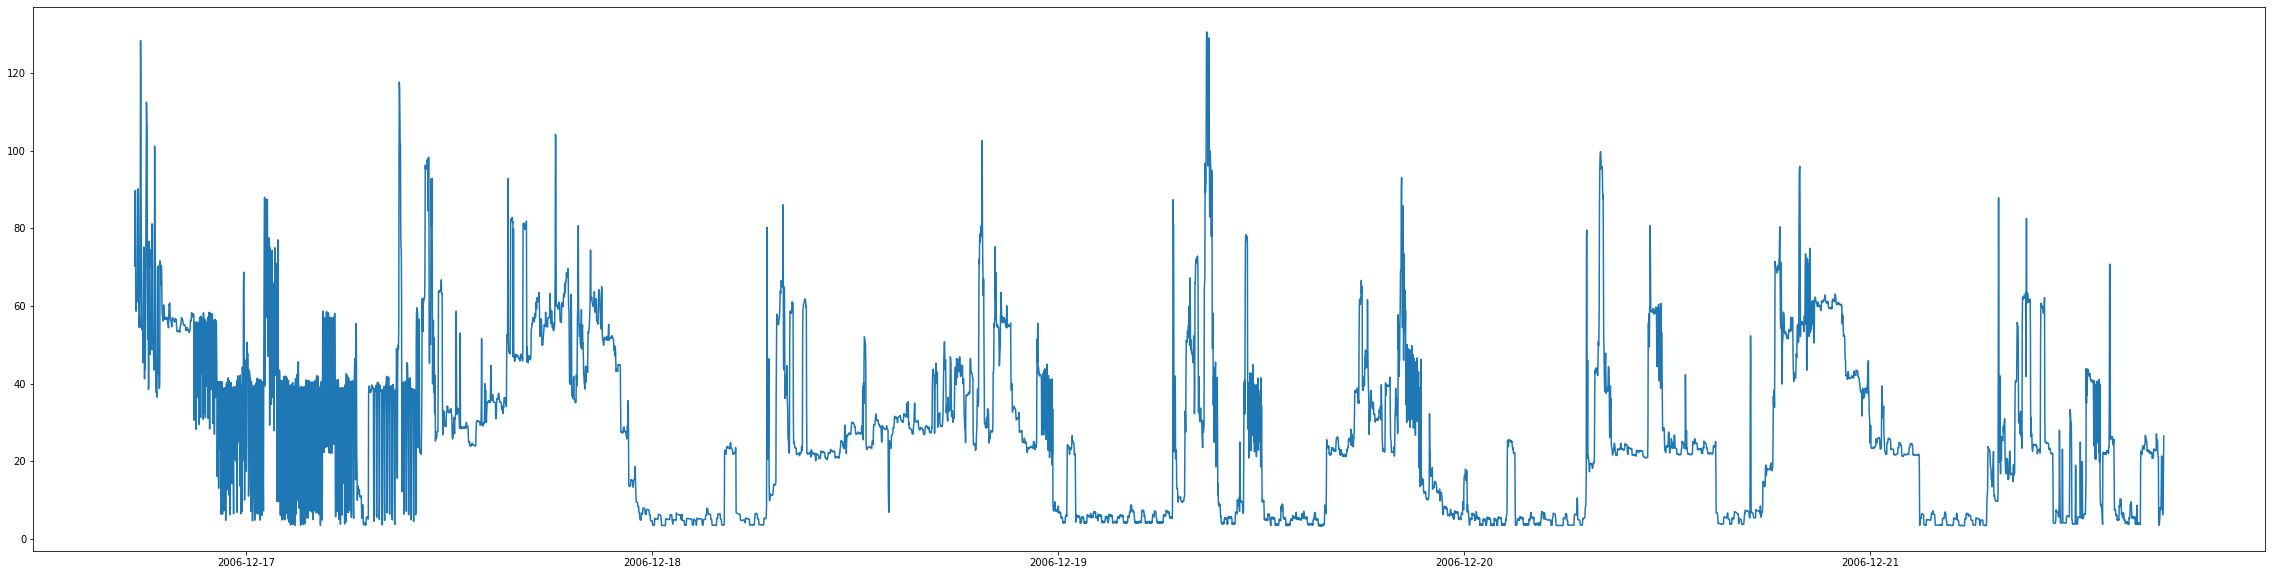

In [31]:
plt.figure(figsize=(40,10))

# plot for 5 days = 7200 minutes
plt.plot(df['DateTime'][:7200],[float(x) for x in df['Global_active_power']][:7200])

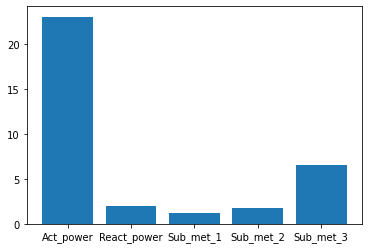

In [32]:
names = ['Act_power', 'React_power', 'Sub_met_1', 'Sub_met_2', 'Sub_met_3']
values = [23.042456, 2.027712, 1.232561, 1.783675, 6.553521]
plt.bar(names, values)
plt.show()

In [33]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm')) #There is a strong correlation between 'Global_active_power'
                                                                                #   and 'Global_intensity' beacuse P = V * I

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.0,0.28,-0.57,1.0,0.43,0.46,0.58
Global_reactive_power,0.28,1.0,-0.16,0.29,0.13,0.18,0.1
Voltage,-0.57,-0.16,1.0,-0.58,-0.24,-0.23,-0.39
Global_intensity,1.0,0.29,-0.58,1.0,0.44,0.46,0.58
Sub_metering_1,0.43,0.13,-0.24,0.44,1.0,0.07,0.12
Sub_metering_2,0.46,0.18,-0.23,0.46,0.07,1.0,0.12
Sub_metering_3,0.58,0.1,-0.39,0.58,0.12,0.12,1.0
